In [27]:
import pickle

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [23]:
test_data = pd.DataFrame(data=[
    [18,13,409,0.095,0.055,0.192],
    [11,11,466,0.088,0.094,0.193],
    [10,24,645,0.105,0.187,0.225],
    [11,11,1104,0.091,0.219,0.231],
    [17,21,503,0.098,0.052,0.159],
], columns=['radius', 'texture', 'area', 'smoothness', 'compactness', 'symmetry'])

expected_y = ["B", "B", "M", "M", "B"]

test_data

,radius,texture,area,smoothness,compactness,symmetry
0,18,13,409,0.095,0.055,0.192
1,11,11,466,0.088,0.094,0.193
2,10,24,645,0.105,0.187,0.225
3,11,11,1104,0.091,0.219,0.231
4,17,21,503,0.098,0.052,0.159


In [21]:
model = pickle.load(open("best_model.pkl", "rb"))
model

Pipeline(steps=[('scaler', StandardScaler()),
                ('selector',
                 RFE(estimator=LogisticRegression(solver='liblinear'),
                     n_features_to_select=2)),
                ('model', LogisticRegression(solver='liblinear'))])

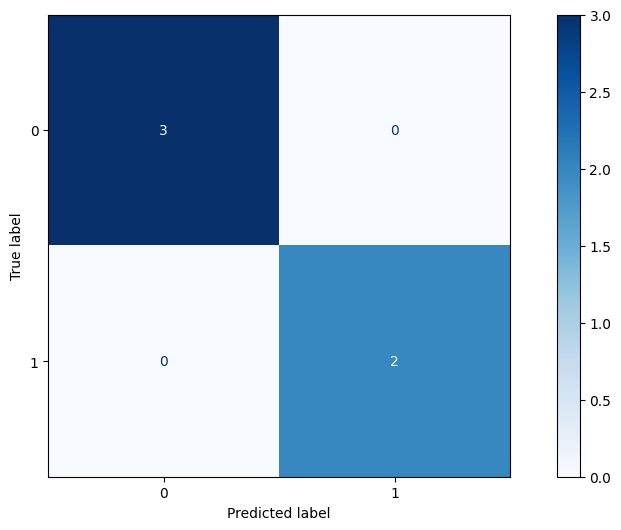

In [29]:
preds = model.predict(test_data)

_, ax = plt.subplots(figsize=(12, 6))

cm = confusion_matrix(expected_y, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", ax=ax)
